In [1]:
# Prediction Of Winning Fantasy Cricket Team

In [2]:
## Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import re

In [3]:
df=pd.read_csv('matches (6).csv')
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
df.isnull().any()

id                 False
season             False
city                True
date               False
match_type         False
player_of_match     True
venue              False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner              True
result             False
result_margin       True
target_runs         True
target_overs        True
super_over         False
method              True
umpire1            False
umpire2            False
dtype: bool

In [6]:
## Checking for null values, if there taking total of null values 
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [7]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
# Dropping irrelevant columns
df.drop('id', axis=1, inplace=True)
df

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [9]:
# In date column has object as datatype , it need to change its datatype
df['date']

0       2008-04-18
1       2008-04-19
2       2008-04-19
3       2008-04-20
4       2008-04-20
           ...    
1090    2024-05-19
1091    2024-05-21
1092    2024-05-22
1093    2024-05-24
1094    2024-05-26
Name: date, Length: 1095, dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date']

0      2008-04-18
1      2008-04-19
2      2008-04-19
3      2008-04-20
4      2008-04-20
          ...    
1090   2024-05-19
1091   2024-05-21
1092   2024-05-22
1093   2024-05-24
1094   2024-05-26
Name: date, Length: 1095, dtype: datetime64[ns]

In [11]:
# Splitting year,month,date into 3 columns
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day


In [12]:
# Dropping date column after splitting
df.drop(['date'],axis=1,inplace=True)

In [13]:
# season column having values with '/' and without '/'
df['season']

0       2007/08
1       2007/08
2       2007/08
3       2007/08
4       2007/08
         ...   
1090       2024
1091       2024
1092       2024
1093       2024
1094       2024
Name: season, Length: 1095, dtype: object

In [14]:
# '/' removed from season column using apply fuction
def clean_season(season):
    if '/' in season:
        return season.split('/')[0]
    else:
        return season
df['season'] = df['season'].apply(clean_season)
df['season']

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
1090    2024
1091    2024
1092    2024
1093    2024
1094    2024
Name: season, Length: 1095, dtype: object

In [15]:
df.columns

Index(['season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

In [16]:
df['player_of_match'].fillna('No Player',inplace=True)
df['winner'].fillna('No Winner',inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['target_runs'].fillna(df['target_runs'].mode()[0], inplace=True)
df['target_overs'].fillna(df['target_overs'].mode()[0], inplace=True)
df['result_margin'].fillna(df['result_margin'].mode()[0], inplace=True)
df['method'].fillna('Normal', inplace=True)

In [17]:
df.isnull().any()

season             False
city               False
match_type         False
player_of_match    False
venue              False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner             False
result             False
result_margin      False
target_runs        False
target_overs       False
super_over         False
method             False
umpire1            False
umpire2            False
year               False
month              False
day                False
dtype: bool

In [18]:
df.isnull().sum()

season             0
city               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
year               0
month              0
day                0
dtype: int64

In [19]:
df.describe()

,result_margin,target_runs,target_overs,year,month,day
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,17.063927,165.684932,19.760000,2016.126027,4.827397,15.786301
std,21.647448,33.381189,1.578989,4.946940,1.611311,8.461224
min,1.000000,43.000000,5.000000,2008.000000,3.000000,1.000000
25%,6.000000,146.000000,20.000000,2012.000000,4.000000,9.000000
50%,8.000000,166.000000,20.000000,2016.000000,4.000000,16.000000
75%,19.000000,187.000000,20.000000,2021.000000,5.000000,23.000000
max,146.000000,288.000000,20.000000,2024.000000,11.000000,31.000000


In [20]:
## Checking any duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1095, dtype: bool

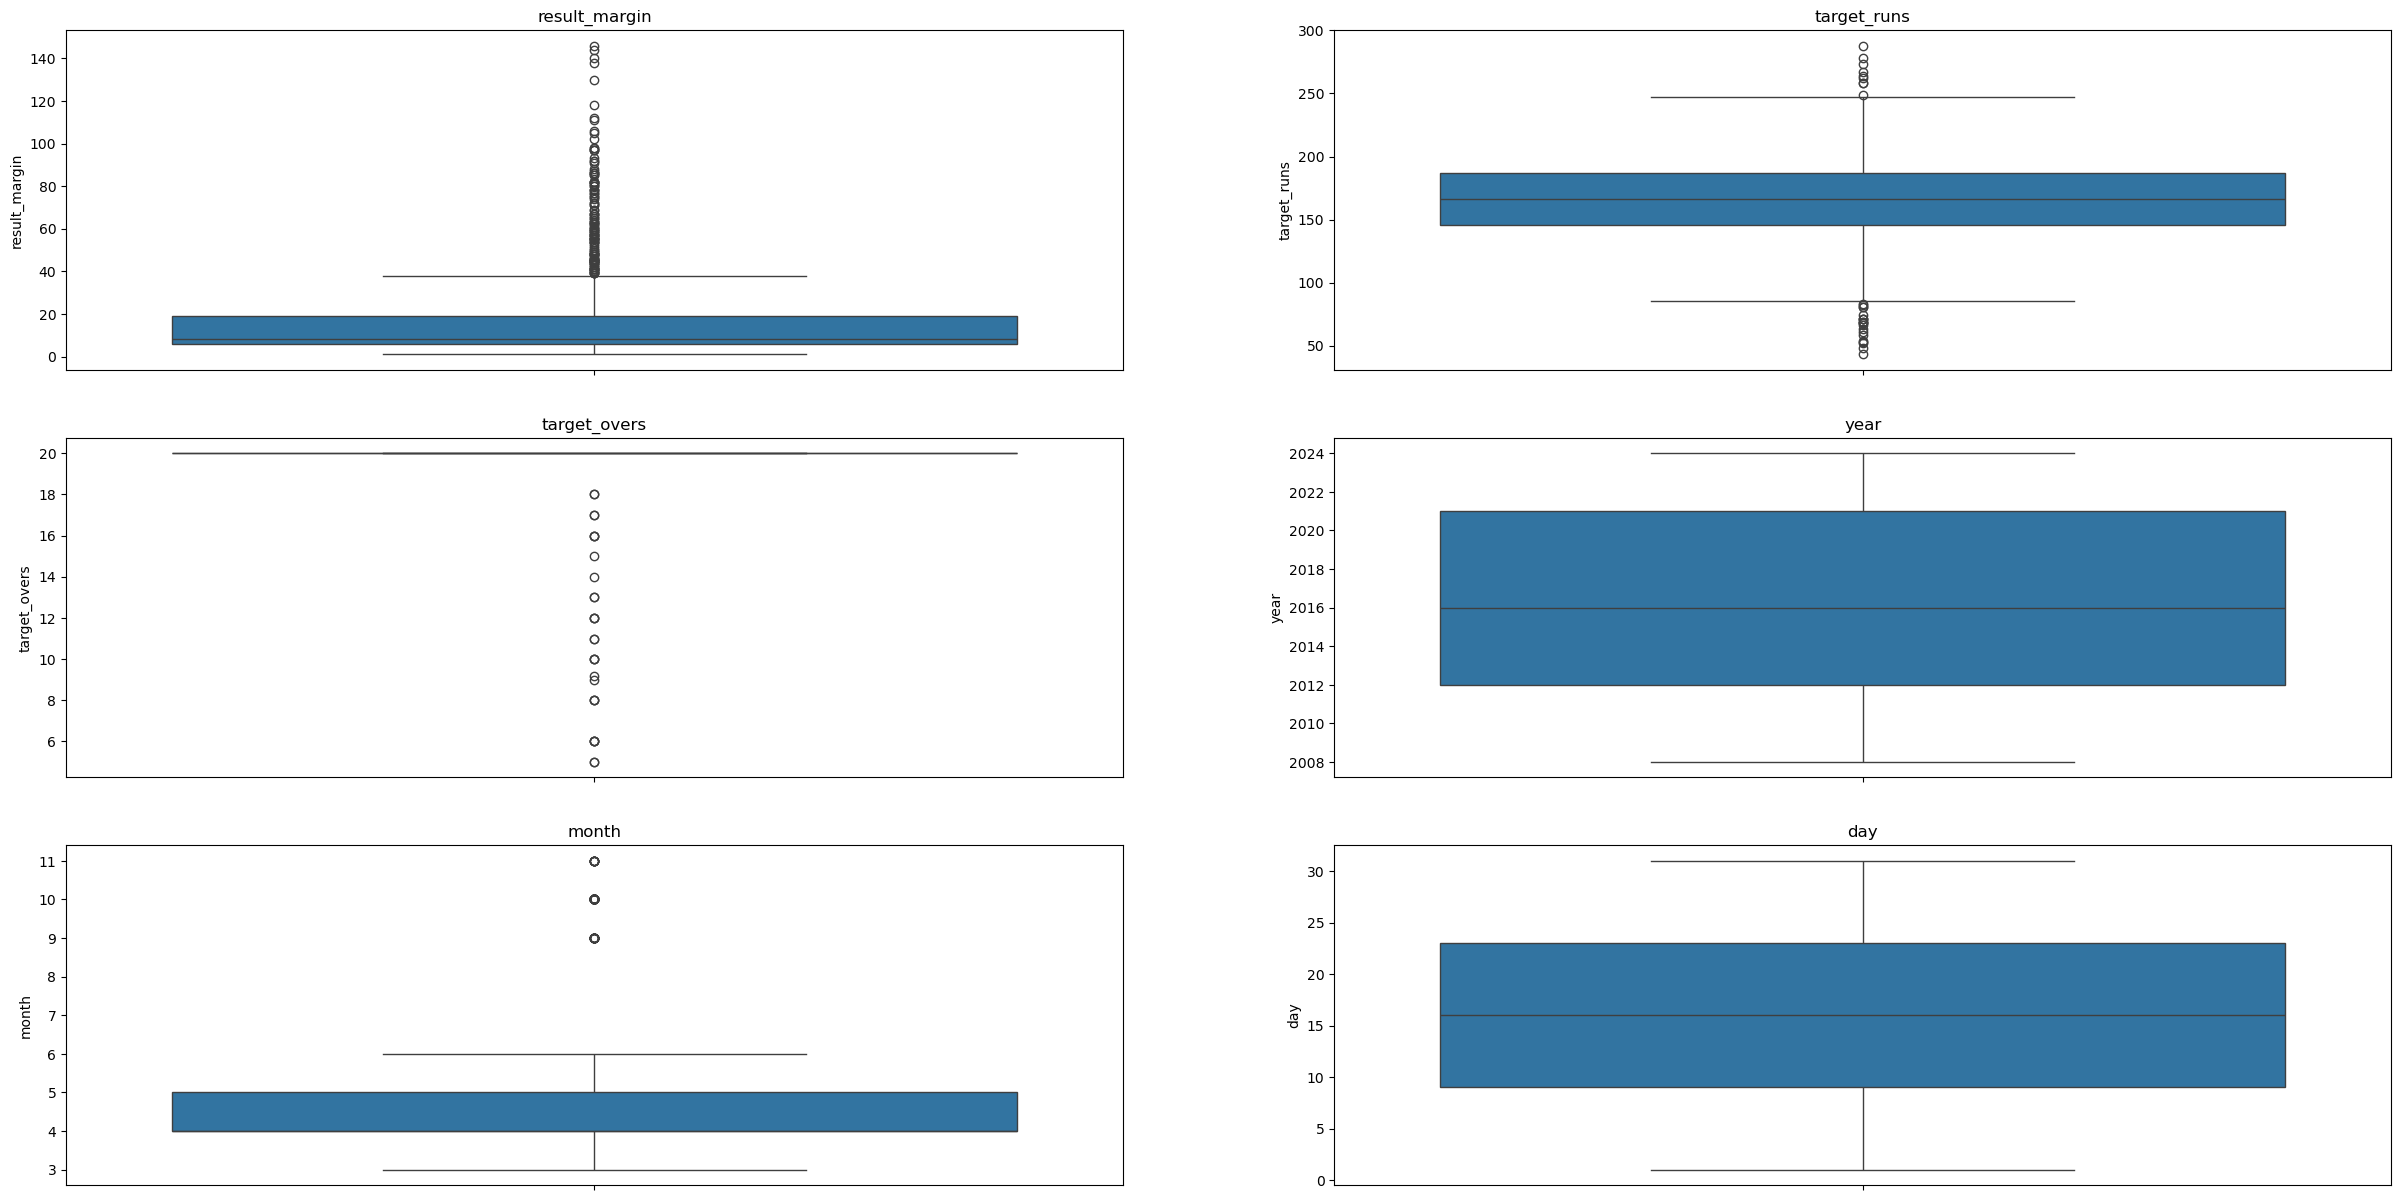

In [21]:
# Checking outliers in numerical columns using boxplot
plt.figure(figsize=(30,15))
Numericals=['result_margin','target_runs','target_overs','year','month','day']
plot=1
for i in Numericals:
    plt.subplot(3,2,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [22]:
# Removing outliers using IQR method
Numerical=['result_margin','target_runs','target_overs','year','month','day']
for i in Numerical:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

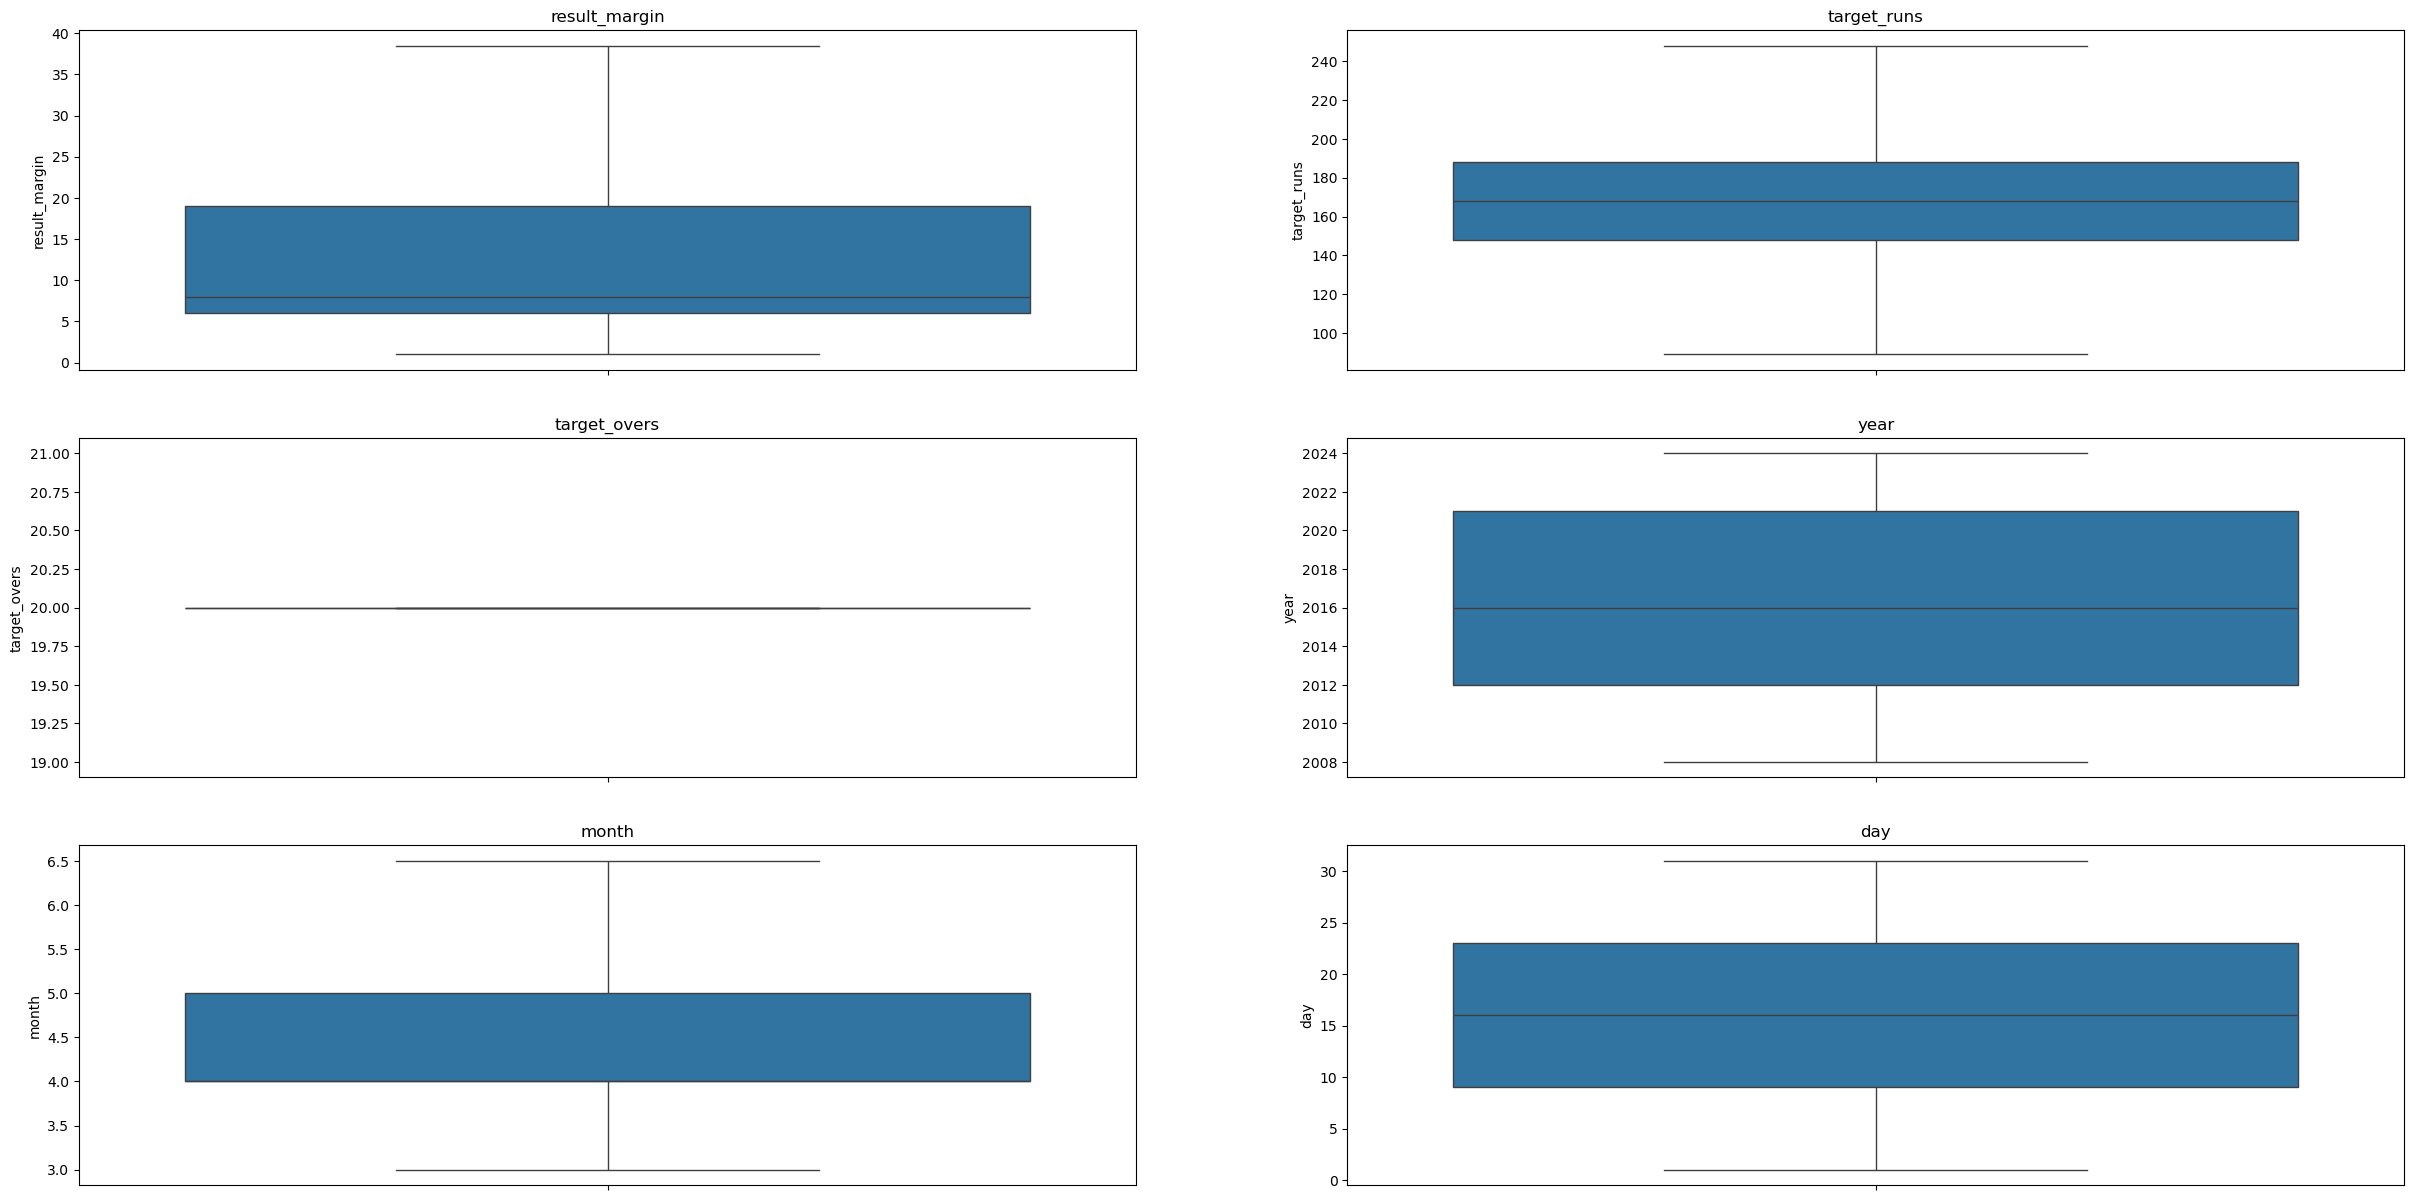

In [23]:
plt.figure(figsize=(30,15))
Numericals=['result_margin','target_runs','target_overs','year','month','day']
plot=1
for i in Numericals:
    plt.subplot(3,2,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1095 non-null   object 
 1   city             1095 non-null   object 
 2   match_type       1095 non-null   object 
 3   player_of_match  1095 non-null   object 
 4   venue            1095 non-null   object 
 5   team1            1095 non-null   object 
 6   team2            1095 non-null   object 
 7   toss_winner      1095 non-null   object 
 8   toss_decision    1095 non-null   object 
 9   winner           1095 non-null   object 
 10  result           1095 non-null   object 
 11  result_margin    1095 non-null   float64
 12  target_runs      1095 non-null   float64
 13  target_overs     1095 non-null   float64
 14  super_over       1095 non-null   object 
 15  method           1095 non-null   object 
 16  umpire1          1095 non-null   object 
 17  umpire2       

In [25]:
# Converting categorical columns into numerical columns using LabelEncoder
le=LabelEncoder()
categorical=['season','city','match_type','player_of_match','venue','team1','team2','toss_winner','toss_decision','winner','result','super_over','method','umpire1','umpire2']
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [26]:
df

,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,0,2,4,37,23,16,8,16,1,8,...,38.5,223.0,20.0,0,1,9,41,2008,4.0,18
1,0,7,4,149,40,6,0,0,0,0,...,33.0,241.0,20.0,0,1,34,52,2008,4.0,19
2,0,10,4,150,16,3,13,13,0,3,...,9.0,130.0,20.0,0,1,8,15,2008,4.0,19
3,0,26,4,167,55,10,16,10,0,17,...,5.0,166.0,20.0,0,1,51,14,2008,4.0,20
4,0,23,4,57,14,8,1,1,0,8,...,5.0,111.0,20.0,0,1,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,4,25,43,12,18,12,0,19,...,4.0,215.0,20.0,0,1,39,59,2024,5.0,19
1091,15,1,5,145,32,18,8,18,0,8,...,8.0,160.0,20.0,0,1,4,39,2024,5.0,21
1092,15,1,2,200,32,17,13,13,1,14,...,4.0,173.0,20.0,0,1,31,31,2024,5.0,22
1093,15,8,6,259,28,18,13,13,1,19,...,36.0,176.0,20.0,0,1,39,59,2024,5.0,24


In [27]:
# Split -Dependent and Independent Variables
x=df.drop(['winner'],axis=1)
x

,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,0,2,4,37,23,16,8,16,1,1,38.5,223.0,20.0,0,1,9,41,2008,4.0,18
1,0,7,4,149,40,6,0,0,0,1,33.0,241.0,20.0,0,1,34,52,2008,4.0,19
2,0,10,4,150,16,3,13,13,0,3,9.0,130.0,20.0,0,1,8,15,2008,4.0,19
3,0,26,4,167,55,10,16,10,0,3,5.0,166.0,20.0,0,1,51,14,2008,4.0,20
4,0,23,4,57,14,8,1,1,0,3,5.0,111.0,20.0,0,1,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,4,25,43,12,18,12,0,3,4.0,215.0,20.0,0,1,39,59,2024,5.0,19
1091,15,1,5,145,32,18,8,18,0,3,8.0,160.0,20.0,0,1,4,39,2024,5.0,21
1092,15,1,2,200,32,17,13,13,1,3,4.0,173.0,20.0,0,1,31,31,2024,5.0,22
1093,15,8,6,259,28,18,13,13,1,1,36.0,176.0,20.0,0,1,39,59,2024,5.0,24


In [28]:
y=df.winner
y

0        8
1        0
2        3
3       17
4        8
        ..
1090    19
1091     8
1092    14
1093    19
1094     8
Name: winner, Length: 1095, dtype: int32

In [29]:
# Getting irrelevant and relevant colums
rf_model = RandomForestClassifier(random_state=42).fit(x, y)
feature_importance = rf_model.feature_importances_
threshold = 0.01
relevant_features = [x.columns[i] for i, importance in enumerate(feature_importance) if importance >= threshold]
irrelevant_features = [x.columns[i] for i, importance in enumerate(feature_importance) if importance < threshold]
print("Relevant Features:", relevant_features)
print("Irrelevant Features:", irrelevant_features)

Relevant Features: ['season', 'city', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'result_margin', 'target_runs', 'umpire1', 'umpire2', 'year', 'month', 'day']
Irrelevant Features: ['match_type', 'target_overs', 'super_over', 'method']


In [30]:
# Finding best model using cross_val_score
cross={'Logistic':{'model':LogisticRegression()},
     'Decision':{'model':DecisionTreeClassifier()},
     'Random':{'model':RandomForestClassifier()},
     'SVC':{'model':SVC()},
     'Catboost':{"model":CatBoostClassifier()},
     'Guassian':{"model":GaussianNB()},
     'KNeighbour':{"model":KNeighborsClassifier()}}

scores=[]
accuracy=[]
for i in cross:
    cvs=cross_val_score(cross[i]['model'],X=x,y=y,cv=10,scoring="accuracy", n_jobs=-1)
    acc=np.mean(cvs)
    scores.append({'model':cross[i]['model'],'score':cvs})
    accuracy.append({'model':cross[i]['model'],'accuracy':acc})

In [31]:
scores

[{'model': LogisticRegression(),
  'score': array([0.25454545, 0.24545455, 0.27272727, 0.29090909, 0.23636364,
         0.21100917, 0.19266055, 0.17431193, 0.11926606, 0.1559633 ])},
 {'model': DecisionTreeClassifier(),
  'score': array([0.5       , 0.35454545, 0.38181818, 0.43636364, 0.43636364,
         0.34862385, 0.4587156 , 0.4587156 , 0.51376147, 0.37614679])},
 {'model': RandomForestClassifier(),
  'score': array([0.47272727, 0.42727273, 0.6       , 0.57272727, 0.59090909,
         0.52293578, 0.58715596, 0.5412844 , 0.43119266, 0.24770642])},
 {'model': SVC(),
  'score': array([0.12727273, 0.13636364, 0.13636364, 0.13636364, 0.13636364,
         0.12844037, 0.12844037, 0.12844037, 0.12844037, 0.12844037])},
 {'model': <catboost.core.CatBoostClassifier at 0x17a4d4ed370>,
  'score': array([0.60909091, 0.59090909, 0.71818182, 0.69090909, 0.71818182,
         0.74311927, 0.80733945, 0.80733945, 0.7706422 , 0.68807339])},
 {'model': GaussianNB(),
  'score': array([0.13636364, 0.1   

In [32]:
accuracy

[{'model': LogisticRegression(), 'accuracy': 0.21532110091743117},
 {'model': DecisionTreeClassifier(), 'accuracy': 0.4265054211843203},
 {'model': RandomForestClassifier(), 'accuracy': 0.4993911592994162},
 {'model': SVC(), 'accuracy': 0.13149291075896583},
 {'model': <catboost.core.CatBoostClassifier at 0x17a4d4ed370>,
  'accuracy': 0.7143786488740618},
 {'model': GaussianNB(), 'accuracy': 0.10953294412010009},
 {'model': KNeighborsClassifier(), 'accuracy': nan}]

In [33]:
x = df.drop(['winner', 'match_type', 'target_overs', 'super_over', 'method'], axis=1)
x

,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,umpire1,umpire2,year,month,day
0,0,2,37,23,16,8,16,1,1,38.5,223.0,9,41,2008,4.0,18
1,0,7,149,40,6,0,0,0,1,33.0,241.0,34,52,2008,4.0,19
2,0,10,150,16,3,13,13,0,3,9.0,130.0,8,15,2008,4.0,19
3,0,26,167,55,10,16,10,0,3,5.0,166.0,51,14,2008,4.0,20
4,0,23,57,14,8,1,1,0,3,5.0,111.0,10,24,2008,4.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,15,16,25,43,12,18,12,0,3,4.0,215.0,39,59,2024,5.0,19
1091,15,1,145,32,18,8,18,0,3,8.0,160.0,4,39,2024,5.0,21
1092,15,1,200,32,17,13,13,1,3,4.0,173.0,31,31,2024,5.0,22
1093,15,8,259,28,18,13,13,1,1,36.0,176.0,39,59,2024,5.0,24


In [34]:
y=df.winner
y

0        8
1        0
2        3
3       17
4        8
        ..
1090    19
1091     8
1092    14
1093    19
1094     8
Name: winner, Length: 1095, dtype: int32

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=98)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

766 766
329 329


In [36]:
# DecisionTree
rf_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2,4],
    'max_features': ['sqrt','log2']
}

rf_model = RandomForestClassifier()
rf_rs = RandomizedSearchCV(rf_model, rf_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning RandomForest...")
rf_rs.fit(xtrain, ytrain)
rf_score = {'model': 'RandomForest', 'best_params': rf_rs.best_params_, 'best_score': rf_rs.best_score_}
print("RandomForest tuning completed!")

# DecisionTree
dt_param_grid = {
    'max_depth': [15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt','log2']
}

dt_model = DecisionTreeClassifier()
dt_rs = RandomizedSearchCV(dt_model, dt_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning DecisionTree...")
dt_rs.fit(xtrain, ytrain)
dt_score = {'model': 'DecisionTree', 'best_params': dt_rs.best_params_, 'best_score': dt_rs.best_score_}
print("DecisionTree tuning completed!")

#catboost
catboost_param_grid = {
    'iterations': [200, 500],
    'depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
    'border_count': [64],
    'bagging_temperature': [0.5],
    'min_data_in_leaf': [5, 10],
}
catboost_model = CatBoostClassifier(thread_count=-1,verbose=1)
catboost_rs = RandomizedSearchCV(catboost_model, catboost_param_grid, cv=3, n_iter=5, random_state=42, n_jobs=-1)
print("Tuning CatBoost...")
catboost_rs.fit(xtrain, ytrain)
catboost_score = {'model': 'CatBoost', 'best_params': catboost_rs.best_params_, 'best_score': catboost_rs.best_score_}
print("CatBoost tuning completed!")

#combine Scores
scores = [catboost_score, rf_score, dt_score]


Tuning RandomForest...
RandomForest tuning completed!
Tuning DecisionTree...
DecisionTree tuning completed!
Tuning CatBoost...
0:	learn: 2.9346252	total: 124ms	remaining: 1m 1s
1:	learn: 2.8714986	total: 140ms	remaining: 34.8s
2:	learn: 2.8302172	total: 155ms	remaining: 25.6s
3:	learn: 2.7678992	total: 170ms	remaining: 21.1s
4:	learn: 2.7099094	total: 186ms	remaining: 18.4s
5:	learn: 2.6676547	total: 200ms	remaining: 16.5s
6:	learn: 2.6275046	total: 217ms	remaining: 15.3s
7:	learn: 2.5939653	total: 233ms	remaining: 14.3s
8:	learn: 2.5553862	total: 248ms	remaining: 13.5s
9:	learn: 2.5099725	total: 265ms	remaining: 13s
10:	learn: 2.4758772	total: 281ms	remaining: 12.5s
11:	learn: 2.4281284	total: 296ms	remaining: 12.1s
12:	learn: 2.3831077	total: 312ms	remaining: 11.7s
13:	learn: 2.3352015	total: 327ms	remaining: 11.4s
14:	learn: 2.3096054	total: 344ms	remaining: 11.1s
15:	learn: 2.2601600	total: 360ms	remaining: 10.9s
16:	learn: 2.2217842	total: 375ms	remaining: 10.7s
17:	learn: 2.19592

In [37]:
scores

[{'model': 'CatBoost',
  'best_params': {'min_data_in_leaf': 10,
   'learning_rate': 0.1,
   'l2_leaf_reg': 5,
   'iterations': 500,
   'depth': 6,
   'border_count': 64,
   'bagging_temperature': 0.5},
  'best_score': 0.6109987745098039},
 {'model': 'RandomForest',
  'best_params': {'n_estimators': 500,
   'min_samples_split': 5,
   'min_samples_leaf': 4,
   'max_features': 'log2',
   'max_depth': 20},
  'best_score': 0.5287479575163399},
 {'model': 'DecisionTree',
  'best_params': {'splitter': 'best',
   'min_samples_split': 5,
   'min_samples_leaf': 2,
   'max_features': 'sqrt',
   'max_depth': 15,
   'criterion': 'gini'},
  'best_score': 0.3094464869281046}]

In [38]:
model=CatBoostClassifier(learning_rate=0.1,l2_leaf_reg=5,iterations=500,depth=6,border_count= 64,bagging_temperature=0.5,min_data_in_leaf=10)
model.fit(xtrain,ytrain)

0:	learn: 2.9346252	total: 28.1ms	remaining: 14s
1:	learn: 2.8714986	total: 45.7ms	remaining: 11.4s
2:	learn: 2.8302172	total: 61.6ms	remaining: 10.2s
3:	learn: 2.7678992	total: 77.6ms	remaining: 9.63s
4:	learn: 2.7099094	total: 94.3ms	remaining: 9.34s
5:	learn: 2.6676547	total: 110ms	remaining: 9.08s
6:	learn: 2.6275046	total: 127ms	remaining: 8.96s
7:	learn: 2.5939653	total: 145ms	remaining: 8.9s
8:	learn: 2.5553862	total: 162ms	remaining: 8.83s
9:	learn: 2.5099725	total: 178ms	remaining: 8.7s
10:	learn: 2.4758772	total: 195ms	remaining: 8.68s
11:	learn: 2.4281284	total: 213ms	remaining: 8.66s
12:	learn: 2.3831077	total: 229ms	remaining: 8.57s
13:	learn: 2.3352015	total: 244ms	remaining: 8.48s
14:	learn: 2.3096054	total: 259ms	remaining: 8.38s
15:	learn: 2.2601600	total: 276ms	remaining: 8.35s
16:	learn: 2.2217842	total: 291ms	remaining: 8.28s
17:	learn: 2.1959228	total: 308ms	remaining: 8.24s
18:	learn: 2.1667081	total: 324ms	remaining: 8.21s
19:	learn: 2.1205525	total: 341ms	remain

In [39]:
xtrain

,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,result,result_margin,target_runs,umpire1,umpire2,year,month,day
539,7,10,44,16,3,4,3,1,1,1.0,173.0,32,46,2016,4.0,27
194,2,26,158,55,10,11,11,0,3,7.0,119.0,9,4,2011,4.0,20
282,3,8,168,27,0,6,6,0,1,7.0,157.0,10,51,2012,4.0,28
701,10,23,16,14,8,6,6,1,1,28.0,219.0,4,58,2019,3.0,27
317,3,18,65,46,13,10,13,0,3,10.0,163.0,22,11,2012,5.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,13,79,22,0,1,1,1,3,6.0,166.0,24,55,2009,4.0,27
708,10,7,244,37,6,2,2,1,1,14.0,167.0,4,12,2019,4.0,1
65,1,13,11,22,0,3,3,0,1,9.0,190.0,13,50,2009,4.0,23
603,8,23,177,14,8,16,16,1,1,38.5,132.0,15,13,2017,4.0,23


In [40]:
ytrain

539     4
194    10
282     6
701     8
317    10
       ..
71      1
708     6
65      3
603     8
554     4
Name: winner, Length: 766, dtype: int32

In [41]:
model.score(xtest,ytest)

0.7598784194528876

In [42]:
label= ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Delhi Capitals','Delhi Daredevils','Gujarat Lions','Gujarat Titans','Kings XI Punjab',
    'Kochi Tuskers Kerala','Lucknow Super Giants','Mumbai Indians','Punjab Kings','Pune Warriors',
    'Rising Pune Supergiant','Rising Pune Supergiants','Royal Challengers Bangalore','Royal Challengers Bengaluru','Sunrisers Hyderabad']

In [43]:
output1 = model.predict([[0,2,4,37,23,16,8,16,1,1,38.5,223.0,20.0,0,1,9,41,2008,4.0,18]])[0]
output1 =int(output1)
print(label[output1])


Royal Challengers Bengaluru


In [44]:
output2=model.predict([[7,20,4,240,17,4,10,4,1,3,6.0,173.0,20.0,0,1,4,13,2016,5.0,21]])[0]
output2 =int(output2)
print(label[output2])

Royal Challengers Bengaluru


In [45]:
ytest

890      9
382     14
1015    14
504     19
926     10
        ..
780     17
113     17
852     13
171     10
176     14
Name: winner, Length: 329, dtype: int32

In [46]:
ypred=model.predict(xtest)
ypred

array([[10],
       [14],
       [14],
       [19],
       [10],
       [10],
       [19],
       [17],
       [ 8],
       [ 0],
       [ 9],
       [ 8],
       [ 2],
       [ 6],
       [ 6],
       [10],
       [ 1],
       [ 0],
       [ 0],
       [10],
       [17],
       [ 6],
       [ 2],
       [ 2],
       [10],
       [17],
       [ 8],
       [13],
       [ 3],
       [ 0],
       [14],
       [ 0],
       [ 0],
       [ 8],
       [19],
       [19],
       [ 0],
       [17],
       [19],
       [14],
       [ 8],
       [ 6],
       [14],
       [ 0],
       [19],
       [ 3],
       [14],
       [ 6],
       [19],
       [ 5],
       [ 8],
       [14],
       [13],
       [ 6],
       [ 1],
       [17],
       [14],
       [17],
       [ 3],
       [10],
       [ 8],
       [14],
       [17],
       [19],
       [ 2],
       [ 4],
       [ 0],
       [14],
       [19],
       [ 3],
       [ 0],
       [19],
       [ 1],
       [10],
       [ 2],
       [ 0],
       [17],

In [47]:
cm=confusion_matrix(ytest,ypred)
cm

array([[39,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  6,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  3,  0, 11,  0,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,
         0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  8,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0, 18,  0,  2,  0,  0,  0,  1,  0,  0,  0,
         0,  4,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  1,  0, 32,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

<Axes: >

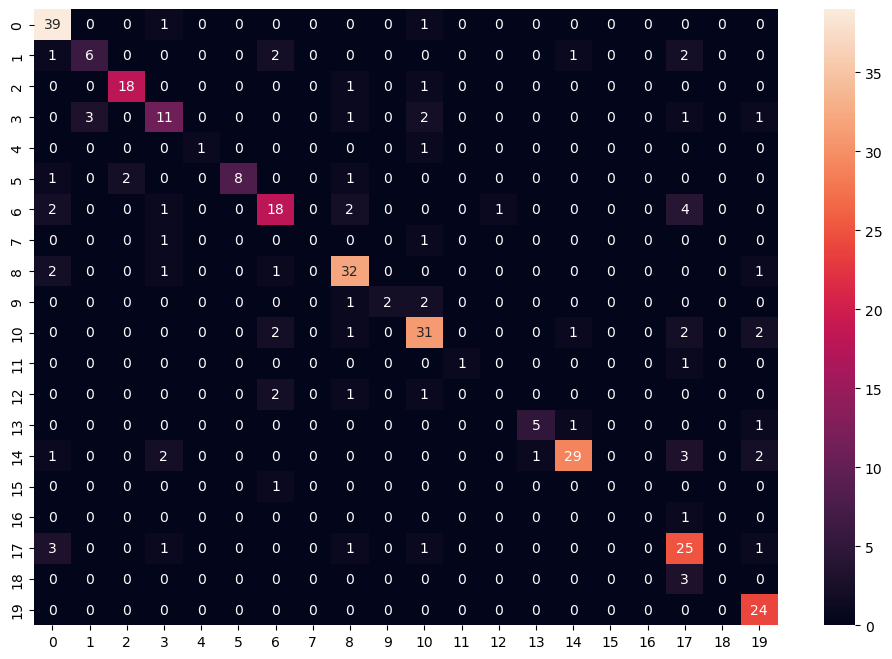

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d")

In [49]:
print("Accuracy_score:",accuracy_score(ytest,ypred))

Accuracy_score: 0.7598784194528876
